# The notebook with all the shit

## Import python packages

In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
%matplotlib inline

## Reading file from bucket

In [2]:
import s3fs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022');

['escience2022/Ada',
 'escience2022/Antoine',
 'escience2022/Dominic',
 'escience2022/ESA_SMOS_sss',
 'escience2022/Remy',
 'escience2022/Sara',
 'escience2022/Zhihong']

In [3]:
#s3path = "s3://escience2022/Zhihong/o3_AERmon_GISS-E2-1-G_historical_r1i1p3f1_gn_185001-190012.nc"
# Using cb_O3 because it is cummulative ozone without the levels
s3path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/cb_O3.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'

In [4]:
#do = xr.open_dataset(s3.open(s3path))
#do

### Get metadata corresponding to near-surface air temperature (tas)

In [5]:
#print(do['cb_O3'])

In [6]:
#do.time.values;

In [7]:
#Converting Ozone to Dobson units:
#https://sacs.aeronomie.be/info/dobson.php
#do['cb_O3']=do['cb_O3']/(2.1415*(10**(-5)))

#do

### Select time

- Select a specific time

In [8]:
#do['cb_O3'].sel(time=cftime.DatetimeNoLeap(1970, 7, 1,0,0,0)).plot(cmap = 'coolwarm')

- select the nearest time. Here from 1st April 1950

In [9]:
#do['cb_O3'].sel(time=cftime.DatetimeNoLeap(1850, 4, 1), method='nearest').plot(x = 'lon',cmap='coolwarm')

# Customize plot

### Set the size of the figure and add coastlines

In [10]:
#fig = plt.figure(1, figsize=[30,13])

# Set the projection to use for plotting
#ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
#ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
#do['cb_O3'].isel(time=6).squeeze().plot.pcolormesh(ax=ax, cmap='coolwarm')

### Change plotting projection

In [11]:
#fig = plt.figure(1, figsize=[10,10])

# We're using cartopy and are plotting in Orthographic projection 
# (see documentation on cartopy)
#ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
#ax.coastlines()

# We need to project our data to the new Orthographic projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
#do['cb_O3'].isel(time=6).squeeze().plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

# One way to customize your title
#plt.title(do.time.values[6].strftime("%B %Y"), fontsize=18)

### Choose the extent of values
- Fix your minimum and maximum values in your plot and
- Use extend so values below the minimum and max

In [12]:
#fig = plt.figure(1, figsize=[10,10])
#
#ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
#ax.coastlines()
#
##Fix extent
#minval = do['cb_O3'].min()
#maxval = do['cb_O3'].max()
#
##pass extent with vmin and vmax parameters
#do['cb_O3'].isel(time=6).squeeze().plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
#
##One way to customize your title
#plt.title(do.time.values[6].strftime("%B %Y"), fontsize=18)


# Multiplots
### Faceting

In [13]:
#proj_plot = ccrs.Orthographic(0, 90)
#
#p = do['cb_O3'].sel(time = do.time.dt.year.isin([1986,1987,1988,1989,1990,1991])).squeeze().plot(x='lon', y='lat', 
#                                                                 transform=ccrs.PlateCarree(),
#                                                                 aspect=do.dims["lon"] / do.dims["lat"],  # for a sensible figsize
#                                                                 subplot_kws={"projection": proj_plot},
#                                                                 col='time', col_wrap=6, robust=True, cmap='PiYG')
## We have to set the map's options on all four axes
#for ax,i in zip(p.axes.flat,  do.time.sel(time = do.time.dt.year.isin([1986,1987,1988,1989,1990,1991])).values):
#    ax.coastlines()
#    ax.set_title(i.strftime("%B %Y"), fontsize=18)

### Combine plots with different projections

In [14]:
#fig = plt.figure(1, figsize=[20,10])

# Fix extent
#minval = do['cb_O3'].min()
#maxval = do['cb_O3'].max()

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
#ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# Plot 2 for Southern Hemisphere
# 2nd plot 
#ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

#tsel = 7
#for ax,t in zip([ax1, ax2], ["Northern", "Southern"]):
    #map = do['cb_O3'].isel(time=tsel).squeeze().plot(ax=ax, 
                                           #transform=ccrs.PlateCarree(), 
                                           #cmap='coolwarm', 
                                           #add_colorbar=False)
    #ax.set_title(t + " Hemisphere \n" , fontsize=15)
    #ax.coastlines()
    #ax.gridlines()

# Title for both plots
#fig.suptitle('O3\n' + do.time.values[tsel].strftime("%B %Y"), fontsize=20)


#cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

#cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
#cbar.ax.tick_params(labelsize=25)
#cbar.ax.set_ylabel('K', fontsize=25)

In [15]:
#month_length = do.time.dt.days_in_month

#wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()

#np.testing.assert_allclose(wgts.groupby("time.year").sum(xr.ALL_DIMS), 1.0)


#da= (do.cb_O3*wgts).groupby('time.year').sum(dim='time')
#da

In [16]:
#doy=do.groupby('time.year').mean('time')
#doy




#doO3_be=da.sel(lon=1, lat=90, method='nearest').sel(year = da.year.isin([1985,1986,1987,1988,1989,1990,1991]))
#doO3_af=da.sel(lon=1, lat=90, method='nearest').sel(year = da.year.isin([1991,1992,1993,1994,1995,1996,1997]))



#mean_be=doO3_be.mean()
#mean_af=doO3_af.mean()


#O3_anomaly_be=mean_be-doO3_be
#O3_anomaly_af=mean_af-doO3_af

#doO3_be.plot(x='year')
#doO3_af.plot(x='year')

#plt.legend()


### Anomaly in weighted aera

In [17]:
def computeWeightedMean(ds):
    # Compute weights based on the xarray you pass
    weights = np.cos(np.deg2rad(ds.lat))
    weights.name = "weights"
    # Compute weighted mean
    air_weighted = ds.weighted(weights)
    weighted_mean = air_weighted.mean(("lon", "lat"))
    return weighted_mean

In [18]:
def mean_plot_doub(data,data2):
    #Funftion that calculated weighted means, anomalies and plots it.
    #Reads in two datasets

    #Selecting time period in datasets
    ds = data.sel(time=slice(start,end))
    ds2 = data2.sel(time=slice(start,end))
    
    #Claculating climatology, annual mean and anomaly
    climatology = ds.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
    annual_mean = ds.groupby('time.year').mean('time')
    anom=annual_mean-climatology
    
    climatology2 = ds2.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
    annual_mean2 = ds2.groupby('time.year').mean('time')
    anom2=annual_mean2-climatology2
    
    #Computing the weighted mean for different regions
    north_anomaly = computeWeightedMean(anom.where(anom['lat']>60.)).compute()
    south_anomaly = computeWeightedMean(anom.where(anom['lat']<-60.)).compute()
    global_anomaly= computeWeightedMean(anom).compute()
    
    north_anomaly2 = computeWeightedMean(anom2.where(anom2['lat']>60.)).compute()
    south_anomaly2 = computeWeightedMean(anom2.where(anom2['lat']<-60.)).compute()
    global_anomaly2= computeWeightedMean(anom2).compute()
    
    
    #Plotting
    fig, (axs1, axs2, axs3) = plt.subplots(1, 3, constrained_layout=True, sharey=True, figsize=(20,10))

    north_anomaly.plot(label="NorESM 14", ax=axs1)
    north_anomaly2.plot(label='NorESM 16', ax=axs1)
    
    south_anomaly.plot(label="NorESM 14", ax=axs2)
    south_anomaly2.plot(label='NorESM 16', ax=axs2)
    
    global_anomaly.plot(label="NorESM 14",ax=axs3)
    global_anomaly2.plot(label='NorESM 16', ax=axs3)

    fig.suptitle('Total Ozone column\n', fontsize=20)

    axs1.set_xlabel('Year',fontsize=20)
    axs2.set_xlabel('Year',fontsize=20)
    axs3.set_xlabel('Year',fontsize=20)
    #axs1.tick_params(fontsize=20)
    
    axs1.tick_params(labelsize=15) 
    axs2.tick_params(labelsize=15) 
    axs3.tick_params(labelsize=15)
    
    axs1.set_xlabel('Year', fontsize=20)
    axs1.set_ylabel('O3 [DU]', fontsize=20)
    
    axs2.set_xlabel('Year', fontsize=20)
    axs2.set_ylabel(' ', fontsize=20)
    
    axs3.set_xlabel('Year', fontsize=20)
    axs3.set_ylabel(' ', fontsize=20)

    axs1.grid()
    axs2.grid()
    axs3.grid()

    axs1.set_title(" Northern Hemisphere \n" , fontsize=20)
    axs2.set_title(" Southern Hemisphere \n" , fontsize=20)
    axs3.set_title('Global Mean \n', fontsize=20)
    plt.legend(fontsize=25)
   

In [19]:
def mean_plot_sing(data):
    #Funftion that calculated weighted means, anomalies and plots it
    #Reads in only one dataset

    #Selecting time period in datasets
    ds = data.sel(time=slice(start,end))
    
    #Claculating climatology, annual mean and anomaly
    climatology = ds.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
    annual_mean = ds.groupby('time.year').mean('time')
    anom=annual_mean-climatology
       
    #Computing the weighted mean for different regions
    north_anomaly = computeWeightedMean(anom.where(anom['lat']>60.)).compute()
    south_anomaly = computeWeightedMean(anom.where(anom['lat']<-60.)).compute()
    global_anomaly= computeWeightedMean(anom).compute()
    
    #Plotting
    fig, (axs1, axs2, axs3) = plt.subplots(1, 3, constrained_layout=True, figsize=(20,10))

    north_anomaly.plot(label="NorESM 14", ax=axs1)
    
    south_anomaly.plot(label="NorESM 14", ax=axs2)
    
    global_anomaly.plot(label="NorESM 14",ax=axs3)

    fig.suptitle('Total Ozone column\n', fontsize=20)

    axs1.set_xlabel('Year',fontsize=20)
    axs2.set_xlabel('Year',fontsize=20)
    axs3.set_xlabel('Year',fontsize=20)
    #axs1.tick_params(fontsize=20)
    
    axs1.set_xlabel('Year', fontsize=20)
    axs1.set_ylabel('O3 [DU]', fontsize=20)
    
    axs2.set_xlabel('Year', fontsize=20)
    axs2.set_ylabel(' ', fontsize=20)
    
    axs3.set_xlabel('Year', fontsize=20)
    axs3.set_ylabel(' ', fontsize=20)
    
    axs1.grid()
    axs2.grid()
    axs3.grid()

    axs1.set_title(" Northern Hemisphere \n" , fontsize=15)
    axs2.set_title(" Southern Hemisphere \n" , fontsize=15)
    axs3.set_title('Global Mean \n', fontsize=15)
    plt.legend(fontsize=25)
   

In [20]:
def forcing_plot(data):
    df = data.sel(time=slice(start,end))
    
    north = computeWeightedMean(df.where(df['lat']>60.)).compute()
    south = computeWeightedMean(df.where(df['lat']<-60.)).compute()
    global_f= computeWeightedMean(df).compute()

    fig, (axs1, axs2, axs3) = plt.subplots(1, 3, constrained_layout=True, sharey=True, figsize=(20,10))

    north.plot(label="NorESM ex.14", ax=axs1)

    south.plot(label="NorESM ex.14", ax=axs2)

    global_f.plot(label="NorESM ex.14",ax=axs3)

    fig.suptitle('SO4 AOD mt. Pinatubo\n', fontsize=20)

    axs1.grid()
    axs2.grid()
    axs3.grid()

    axs1.tick_params(labelsize=20) 
    axs2.tick_params(labelsize=20)
    axs3.tick_params(labelsize=20)
    
    axs1.set_title(" Northern Hemisphere \n" , fontsize=15)
    axs2.set_title(" Southern Hemisphere \n" , fontsize=15)
    axs3.set_title('Globam Mean \n', fontsize=15)
    plt.legend(fontsize=25)

In [21]:
def n_forcing_plot(data, x_la, y_la, title):
    df = data.sel(time=slice(start,end))
    
    north = computeWeightedMean(df.where(df['lat']>60.)).compute()
    south = computeWeightedMean(df.where(df['lat']<-60.)).compute()
    global_f= computeWeightedMean(df).compute()

    fig, axs1 = plt.subplots(1, 1, constrained_layout=True, sharey=True, figsize=(7,7))

    north.plot(label='NH', ax=axs1)

    south.plot(label="SH", ax=axs1)

    global_f.plot(label="Global",ax=axs1)

    fig.suptitle(title, fontsize=15)
    
    axs1.set_xlabel(x_la, fontsize=15)
    axs1.set_ylabel(y_la, fontsize=15)

    axs1.grid()
    axs1.tick_params(labelsize=15) 
    
    plt.legend(fontsize=15)

In [22]:
def multi_plot(data,yr,cs):
    proj_plot = ccrs.Robinson(central_longitude=0, globe=None)

    p = data.sel(time = data.time.dt.year.isin([yr])).squeeze().plot(x='lon', y='lat', 
                                                                     transform=ccrs.PlateCarree(),
                                                                     #aspect=dso4_3.dims["lon"] / dso4_3.dims["lat"],  # for a sensible figsize
                                                                     subplot_kws={"projection": proj_plot},
                                                                     col='time', col_wrap=4, robust=True, cmap=cs)
    # We have to set the map's options on all four axes
    for ax,i in zip(p.axes.flat,  data.time.sel(time = data.time.dt.year.isin([yr])).values):
        ax.coastlines()
        ax.set_title(i.strftime("%B %Y"), fontsize=18)

## CODE

In [23]:
#Reading in ozone data from experiment 16
s6path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test16/cb_O3.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test16.cam.h0.197001-201412.nc'
d2 = xr.open_dataset(s3.open(s6path))
d2.time.values;
ds2=d2['cb_O3']/(2.1415*(10**(-5)))

In [24]:
#Data from experiment 14
do = xr.open_dataset(s3.open(s3path))
do.time.values;
ds=do['cb_O3']/(2.1415*(10**(-5)))
#assign_attrs({'units': '$^\circ$C'})

#ds

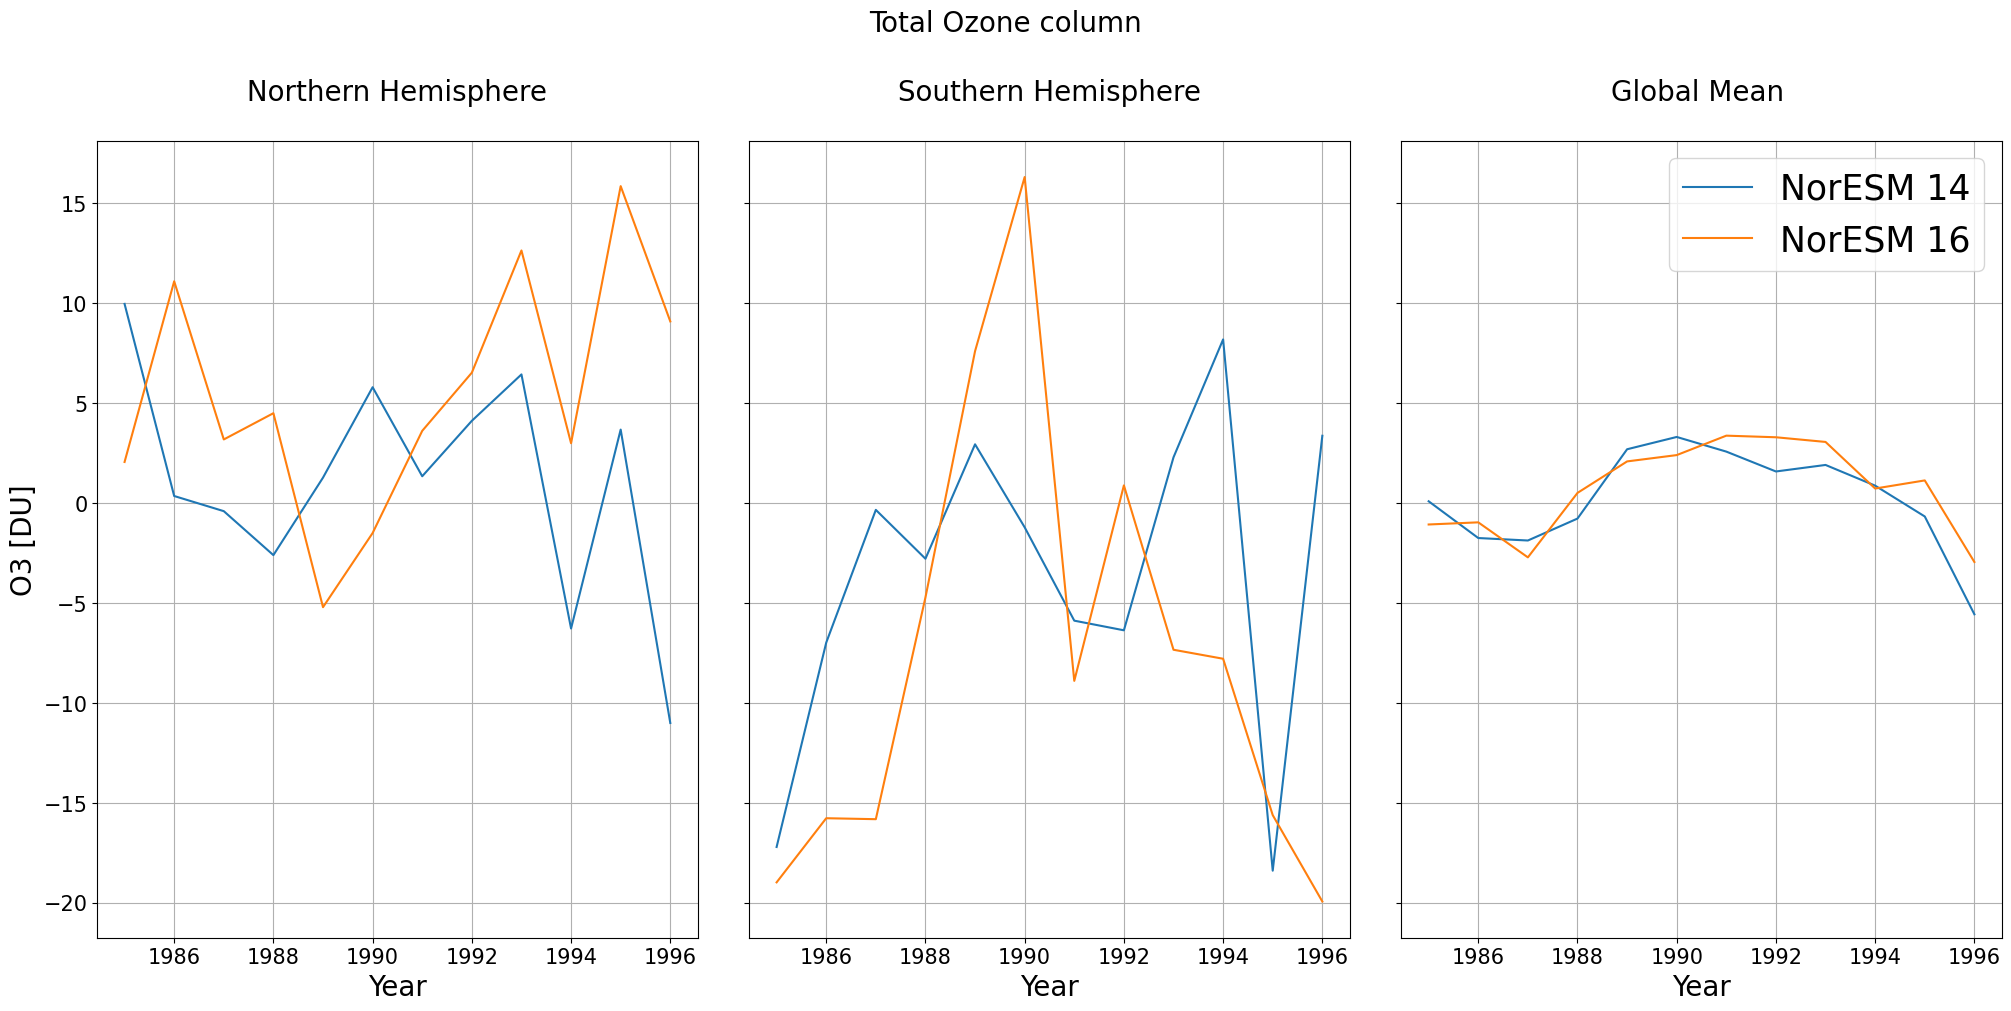

In [25]:
start = cftime.DatetimeNoLeap(1985,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1991,1,15)
end = cftime.DatetimeNoLeap(1996,1,15)

mean_plot_doub(ds,ds2)

In [26]:
#n_diff = computeWeightedMean(difference.where(difference['lat']>60.)).compute()
#s_diff = computeWeightedMean(difference.where(difference['lat']<-60.)).compute()
#g_diff= computeWeightedMean(difference).compute()

In [27]:
#fig, (axs1, axs2, axs3) = plt.subplots(1, 3, constrained_layout=True, figsize=(20,10))
#
##w_m_w_n_anomaly.sel(time=slice(start,end)).plot(label="CAM", ax=axs1)
#n_diff.plot(label="NorESM", ax=axs1)
##weighted_mean_waccm.sel(time=slice(start,end)).plot(label="WACCM-org", ax=axs1)
#
##w_m_w_south_anomaly.sel(time=slice(start,end)).plot(label="CAM", ax=axs2)
#s_diff.plot(label="NorESM", ax=axs2)
##weighted_mean_waccm_south.sel(time=slice(start,end)).plot(label="WACCM-org", ax=axs2)
#
#g_diff.plot(label="NorESM",ax=axs3)
#
#fig.suptitle('Total Ozone column\n', fontsize=20)
#
#axs1.set_title(" Northern Hemisphere \n" , fontsize=15)
#axs2.set_title(" Southern Hemisphere \n" , fontsize=15)
#axs3.set_title('Globam Mean \n', fontsize=15)
#plt.legend(fontsize=25)

In [28]:
#Reading in temp data from experiment 14
s7path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/T.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'
dt = xr.open_dataset(s3.open(s7path))
dt.time.values;
dtt=dt['T'].isel(lev=-1)

In [29]:
mean_dt=dtt.drop('lev')

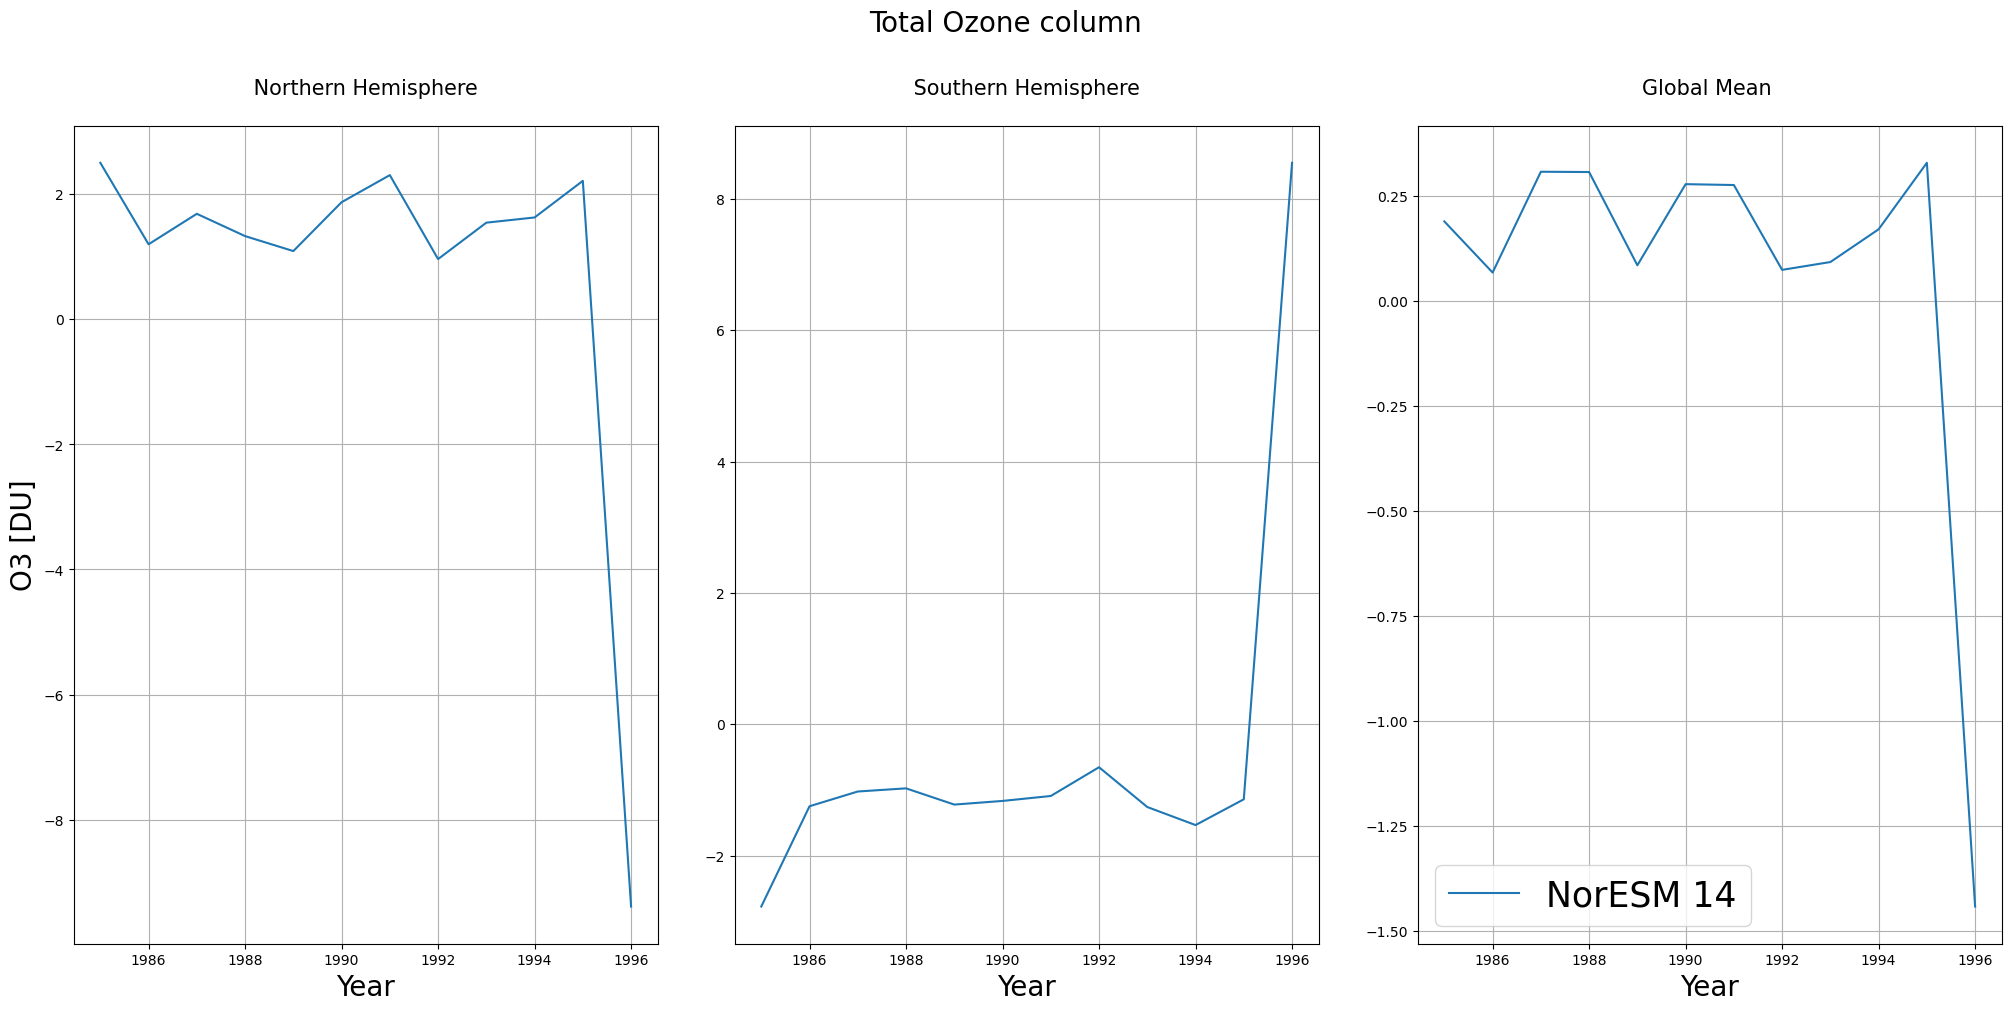

In [30]:
start = cftime.DatetimeNoLeap(1985,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1991,1,15)
end = cftime.DatetimeNoLeap(1996,1,15)

mean_plot_sing(mean_dt)


### Sulfate


In [31]:
s4path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/cb_SULFATE.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'
du = xr.open_dataset(s3.open(s4path))
du.time.values;

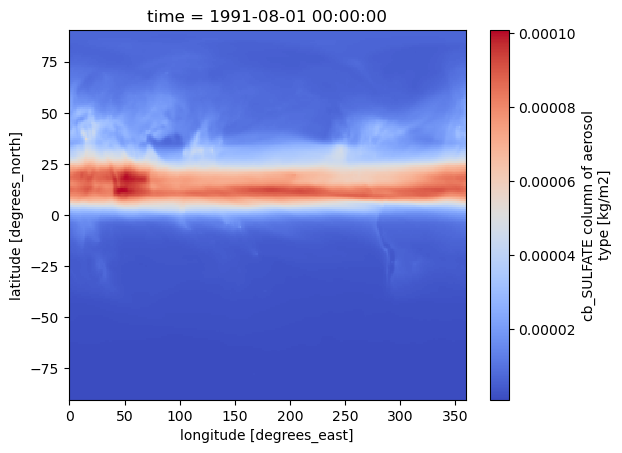

In [32]:
du['cb_SULFATE'].sel(time=cftime.DatetimeNoLeap(1991, 8, 1,0,0,0)).plot(cmap = 'coolwarm')

In [33]:
s5path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/D550_SO4.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'
da = xr.open_dataset(s3.open(s5path))
dr = da['D550_SO4']
dr;


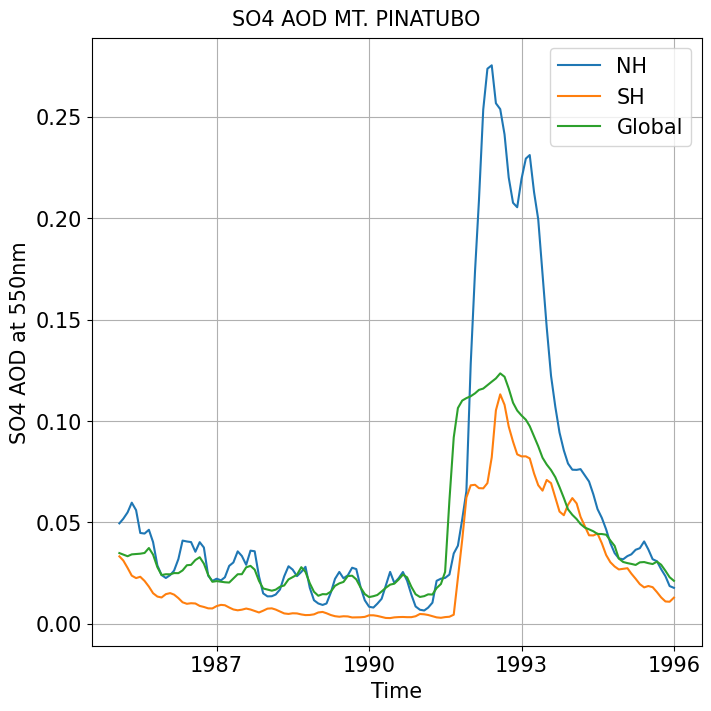

In [34]:
start = cftime.DatetimeNoLeap(1985,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1991,1,15)
end = cftime.DatetimeNoLeap(1996,1,15)

n_forcing_plot(dr,'Time','SO4 AOD at 550nm','SO4 AOD MT. PINATUBO')

In [35]:
dr

<xarray.DataArray 'D550_SO4' (time: 540, lat: 192, lon: 288)>
[29859840 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1970-02-01 00:00:00 ... 2015-01-01 00:00:00
Attributes:
    units:         unitless
    long_name:     SO4 aerosol optical depth 550nm
    cell_methods:  time: mean

## Looking into data from around Krakatao

In [36]:
#Reading in ozone data from historical
his_path = 's3://escience2022/Zhihong/NHISTvsls/cb_O3.NHISTvsls_tropstratchem_prep_f09_nt14_20220223_test01.cam.h0.185001-189912.nc'
dh = xr.open_dataset(s3.open(his_path))
dh.time.values;
dh2=dh['cb_O3']/(2.1415*(10**(-5)))
dh2;


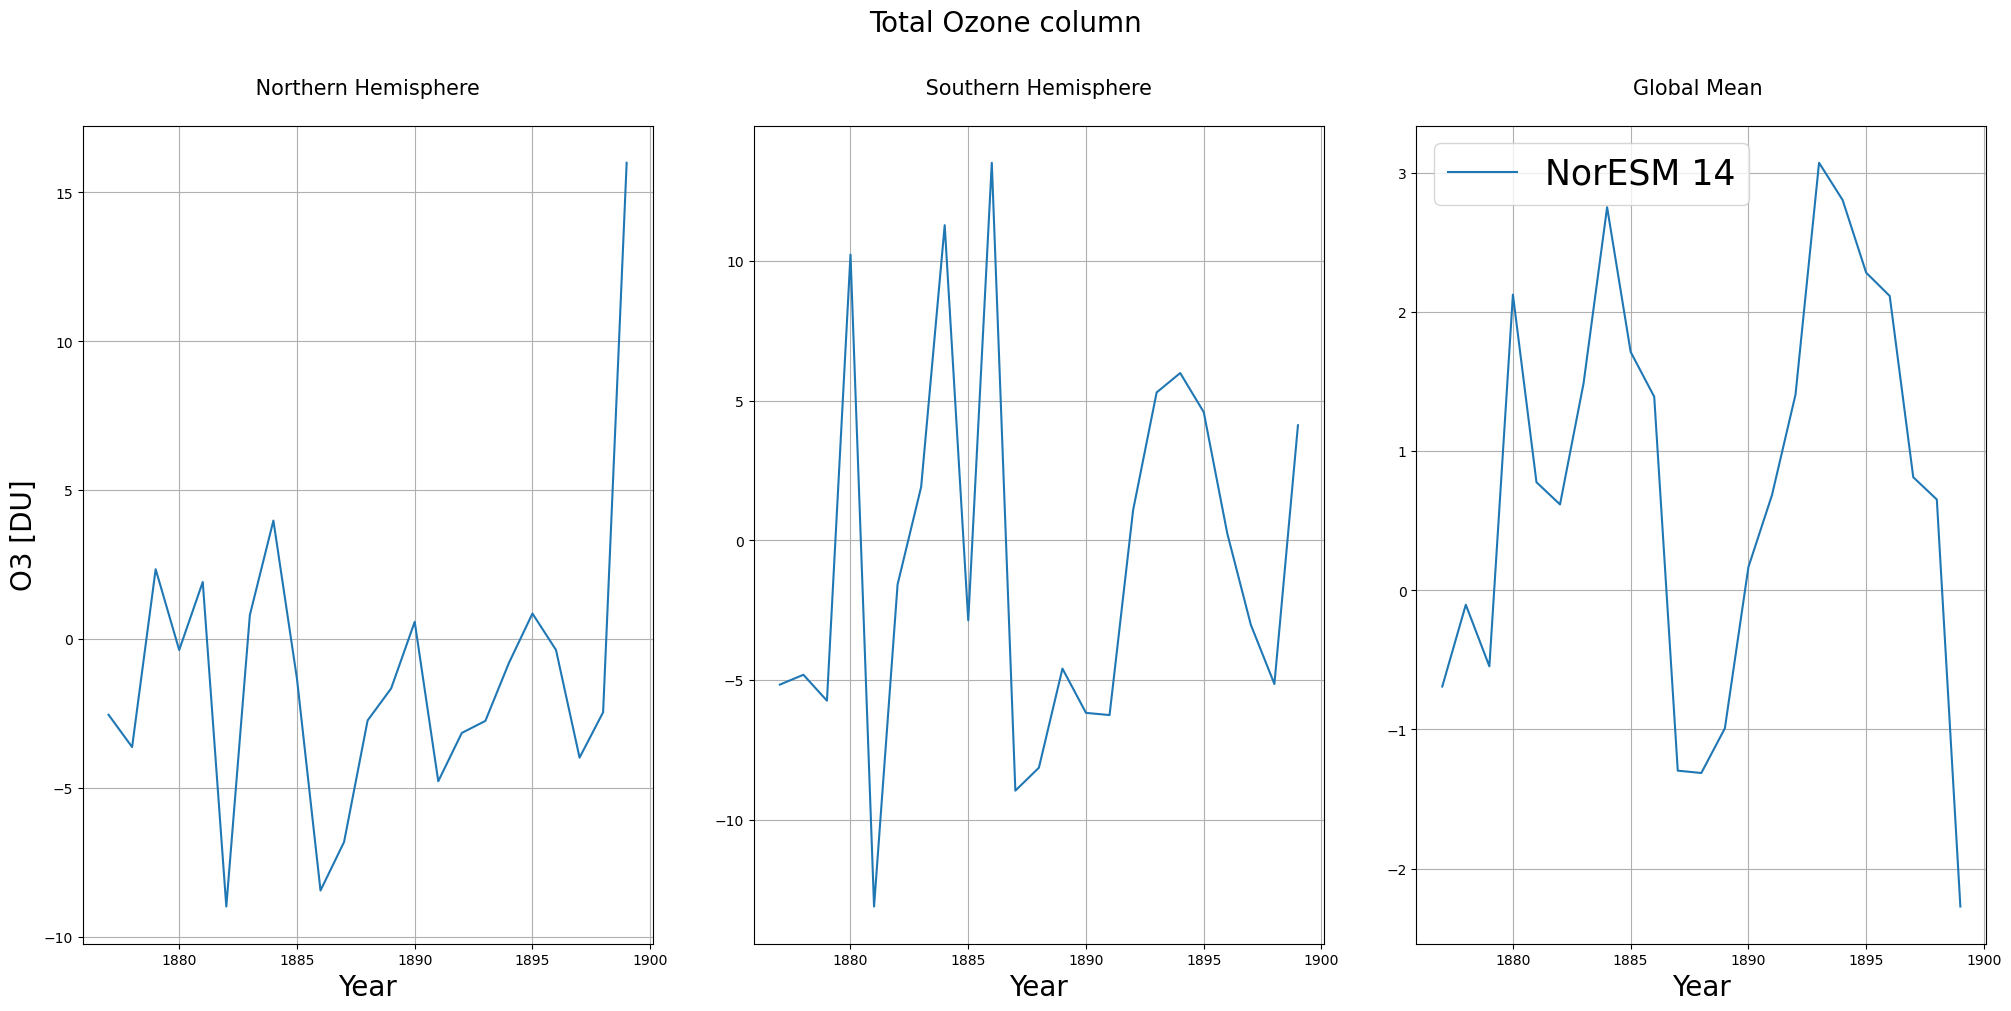

In [37]:
start = cftime.DatetimeNoLeap(1877,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1883,1,15)
end = cftime.DatetimeNoLeap(1899,1,15)

mean_plot_sing(dh2)

# Forcing


In [38]:
#Reading in aod data from historical
his_path_f = 's3://escience2022/Zhihong/NHISTvsls/D550_SO4.NHISTvsls_tropstratchem_prep_f09_nt14_20220223_test01.cam.h0.185001-189912.nc'
df = xr.open_dataset(s3.open(his_path_f))
df.time.values;
df2=df['D550_SO4']

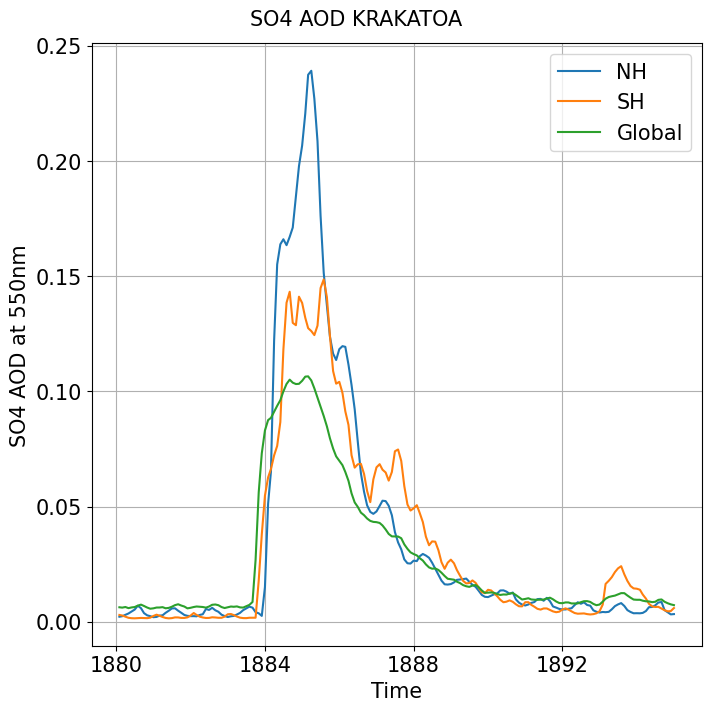

In [39]:
start = cftime.DatetimeNoLeap(1880,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1883,1,15)
end = cftime.DatetimeNoLeap(1895,1,15)

n_forcing_plot(df2,'Time','SO4 AOD at 550nm','SO4 AOD KRAKATOA')

## Layers and forcing

In [40]:
#Reading in SO4 layer data from historical
so4_l = 's3://escience2022/Zhihong/NHISTvsls/mmr_SULFATE.NHISTvsls_tropstratchem_prep_f09_nt14_20220223_test01.cam.h0.185001-189912.nc'
d4 = xr.open_dataset(s3.open(so4_l))
d4.time.values;
dso4=d4['mmr_SULFATE']
dso4_2=d4['mmr_SULFATE']

In [41]:
dso4.mean('lon')
north_avrg = computeWeightedMean(dso4.where(dso4['lat']>60.)).compute()
start = cftime.DatetimeNoLeap(1880,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1883,1,15)
end = cftime.DatetimeNoLeap(1892,1,15)

dso4_s = north_avrg.sel(time=slice(start,end))

In [42]:
annual_mean = dso4_s.groupby('time.year').mean('time')

annual_means= annual_mean.isel(lev=slice(0,-20))
annual_means;

Text(0.5, 1.0, ' Northern Hemisphere yearly mean \n')

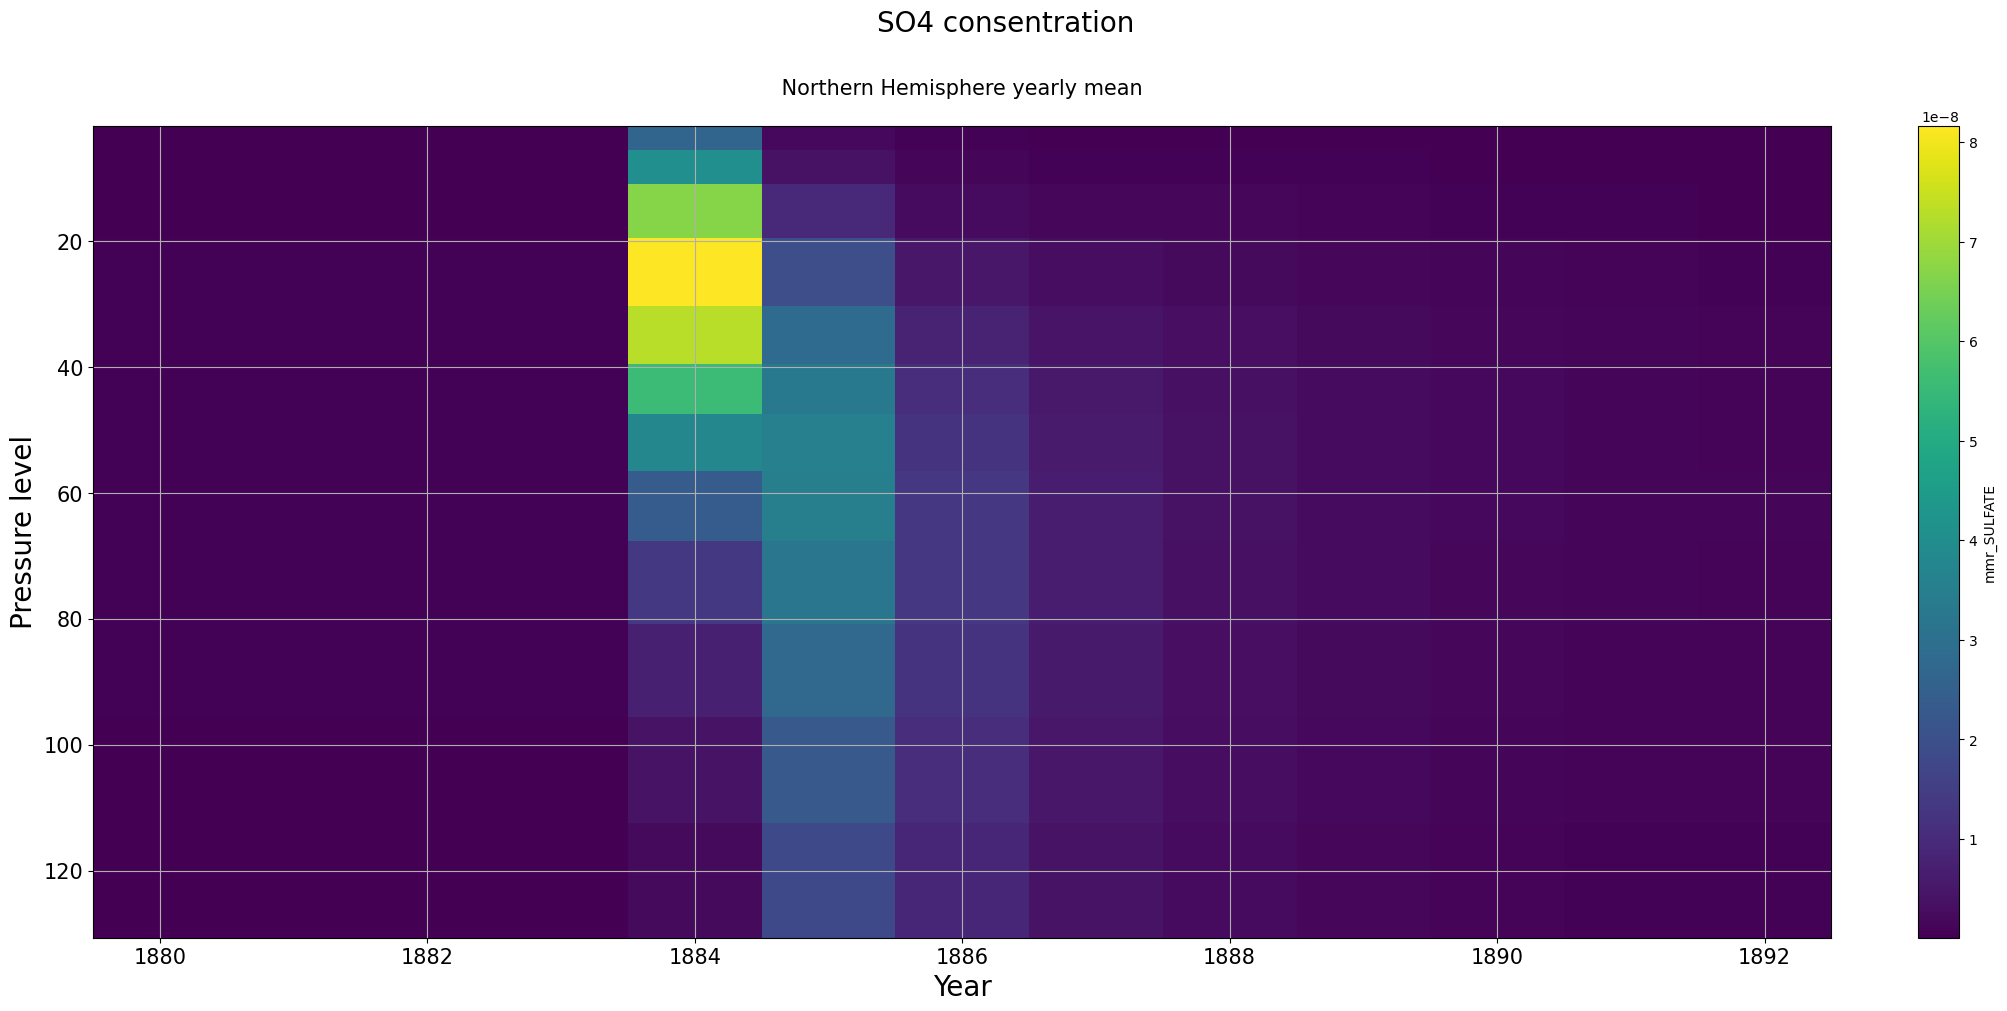

In [43]:
#Plotting to find the layer where the SO4 aerosol has its max, and when
fig, (axs1) = plt.subplots(1, 1, constrained_layout=True, figsize=(20,10))

annual_means.plot(label="NorESM 14", ax=axs1,x='year')

fig.suptitle('SO4 consentration\n', fontsize=20)


axs1.grid()

plt.gca().invert_yaxis()
axs1.set_xlabel('Year', fontsize=20)
axs1.set_ylabel('Pressure level', fontsize=20)
axs1.tick_params(labelsize=15) 

axs1.set_title(" Northern Hemisphere yearly mean \n" , fontsize=15)


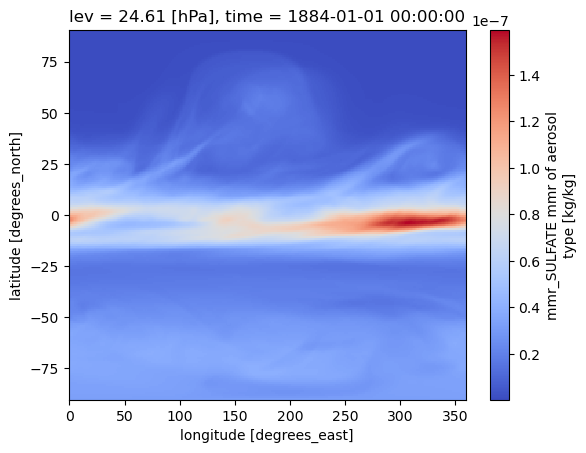

In [44]:
dso4_2.sel(time=cftime.DatetimeNoLeap(1884, 1, 1), method='nearest').sel(lev=24, method='nearest').plot(x = 'lon',cmap='coolwarm')

In [45]:
dso4_3=dso4_2.sel(lev=24, method='nearest').drop('lev')
dso4_3.time.values;
dso4_3;

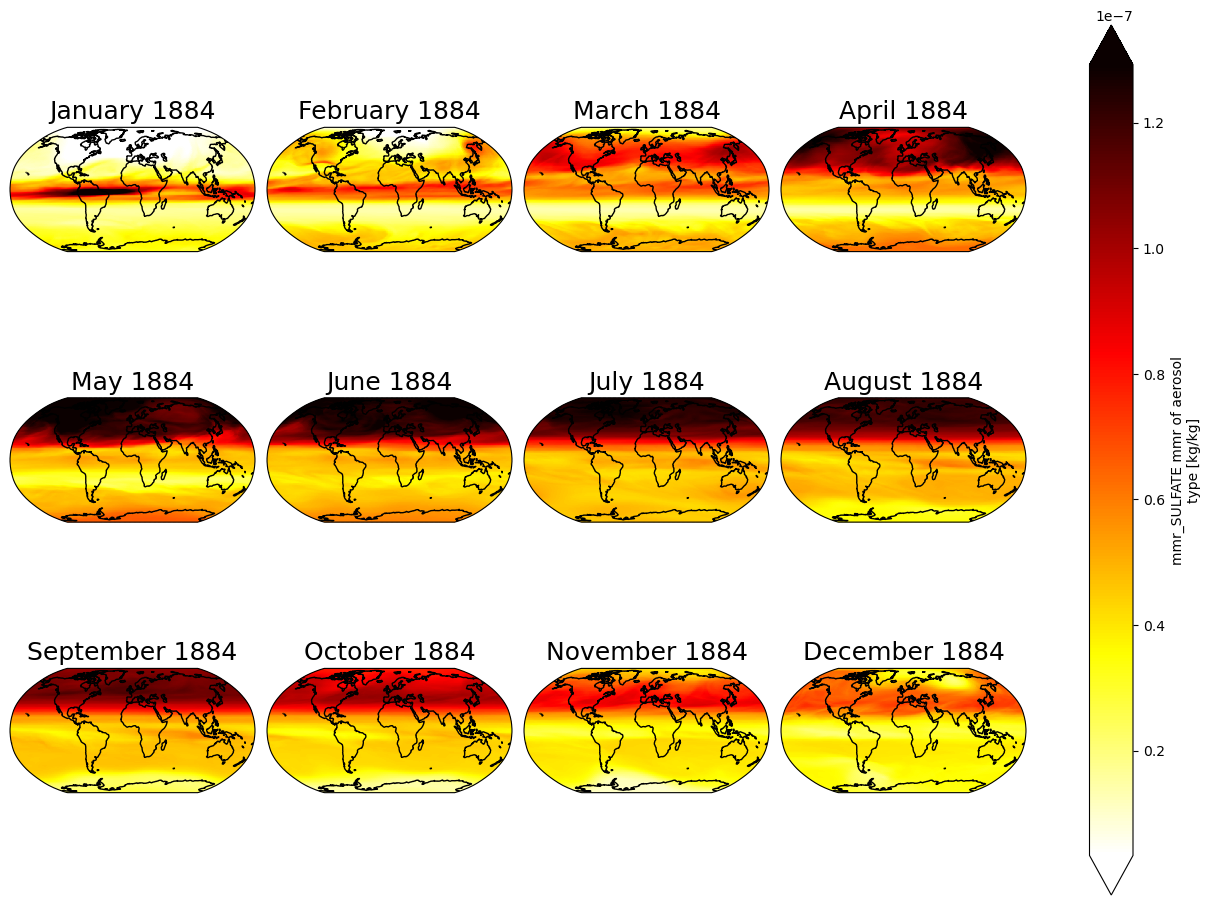

In [46]:
multi_plot(dso4_3,1884,'hot_r')

In [47]:
#Reading in ozone layer data from historical
o3_l = 's3://escience2022/Zhihong/NHISTvsls/O3.NHISTvsls_tropstratchem_prep_f09_nt14_20220223_test01.cam.h0.185001-189912.nc'
o3_l2 = xr.open_dataset(s3.open(o3_l))
o3_l2.time.values;
ds_o3=o3_l2['O3']

In [48]:
dso3_lev=ds_o3.sel(lev=24, method='nearest').drop('lev')

In [49]:
climatology = dso3_lev.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
#annual_mean = dso3_lev.groupby('time.year').mean('time')
anom=dso3_lev-climatology

multi_plot(anom)

TypeError: multi_plot() missing 2 required positional arguments: 'yr' and 'cs'

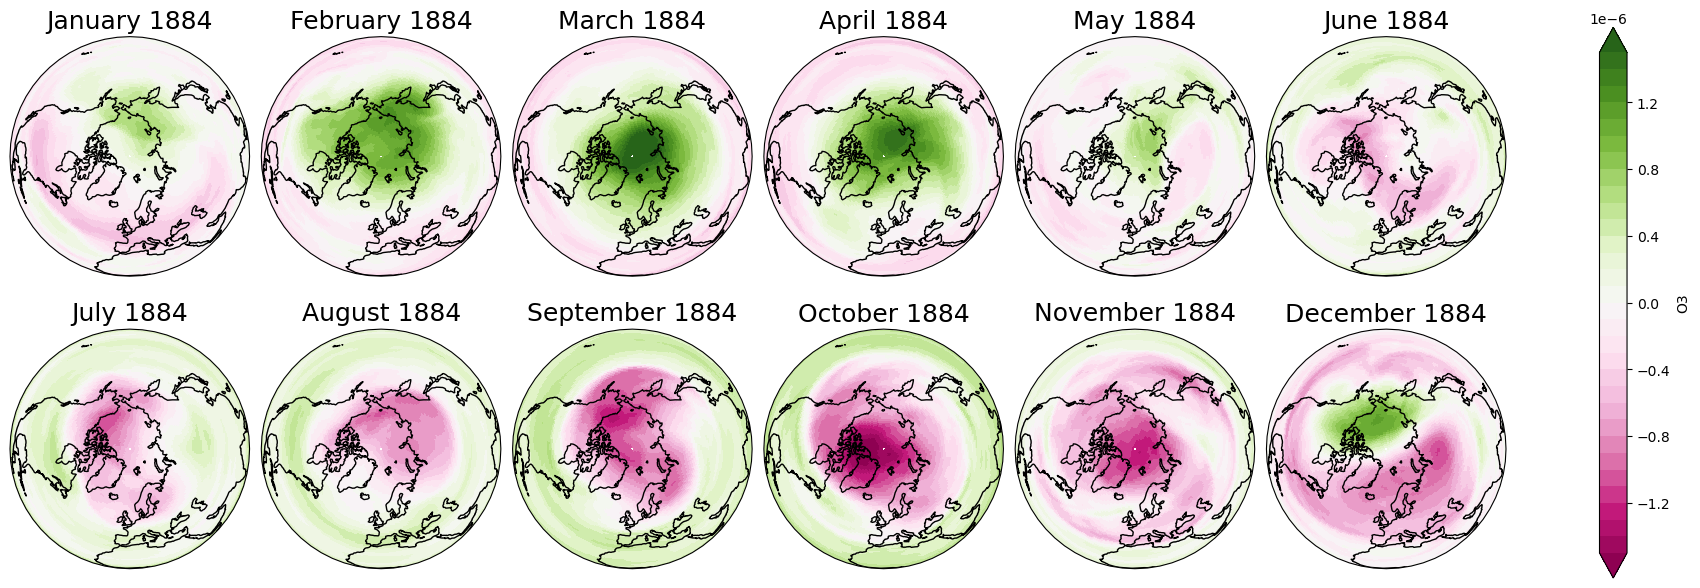

In [50]:
#Plotting o3 for krakatoa in layer 24
proj_plot = ccrs.Orthographic(0, 90)

p = anom.sel(time = anom.time.dt.year.isin([1884])).squeeze().plot(x='lon', y='lat', 
                                                                 transform=ccrs.PlateCarree(),levels=np.linspace(-1.5e-6,1.5e-6,31),
                                                                 #aspect=anom.dims["lon"] / anom.dims["lat"],  # for a sensible figsize
                                                                 subplot_kws={"projection": proj_plot},
                                                                 col='time', col_wrap=6, robust=True, cmap='PiYG',)


# We have to set the map's options on all four axes
for ax,i in zip(p.axes.flat,  anom.time.sel(time = anom.time.dt.year.isin([1884])).values):
    ax.coastlines()
    ax.set_title(i.strftime("%B %Y"), fontsize=18)
    
    

Text(-2.1, 2.6, 'Ozone anomaly at 3.6 hPa, Karakatoa')

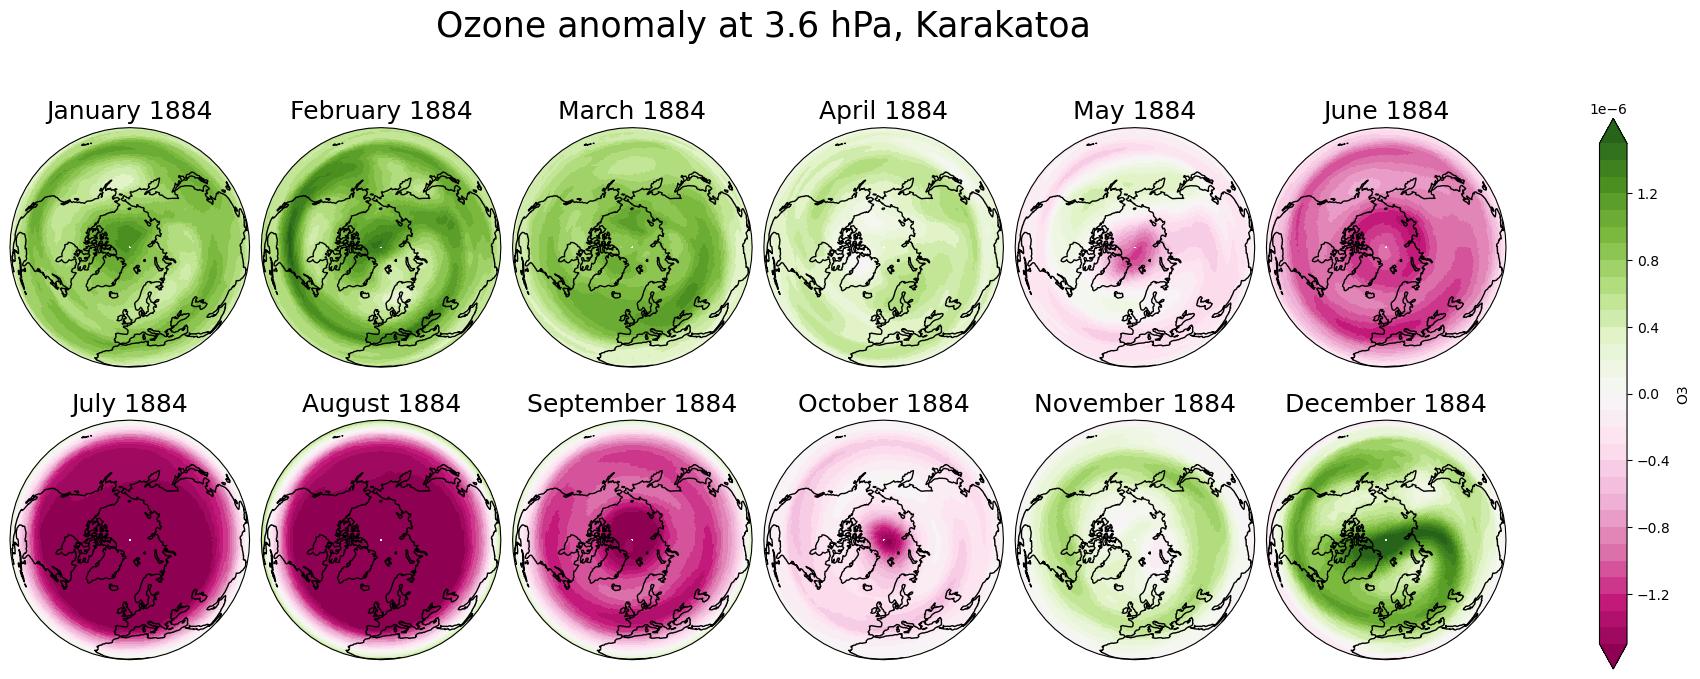

In [51]:
#krakatoa at ozone layer 3,6
dso3_lev=ds_o3.sel(lev=3.6, method='nearest').drop('lev')

climatology = dso3_lev.sel(time=slice(start, end_prior_eruption)).groupby('time.year').mean('time',keep_attrs=True).mean('year')
#annual_mean = dso3_lev.groupby('time.year').mean('time')
anom=dso3_lev-climatology

proj_plot = ccrs.Orthographic(0, 90)

p = anom.sel(time = anom.time.dt.year.isin([1884])).squeeze().plot(x='lon', y='lat', levels=np.linspace(-1.5e-6,1.5e-6,31),
                                                                 transform=ccrs.PlateCarree(),
                                                                 #aspect=anom.dims["lon"] / anom.dims["lat"],  # for a sensible figsize
                                                                 subplot_kws={"projection": proj_plot},
                                                                 col='time', col_wrap=6, robust=True, cmap='PiYG')
# We have to set the map's options on all four axes
for ax,i in zip(p.axes.flat,  anom.time.sel(time = anom.time.dt.year.isin([1884])).values):
    ax.coastlines()
    ax.set_title(i.strftime("%B %Y"), fontsize=18)
    
ax.text(-2.1, 2.60, 'Ozone anomaly at 3.6 hPa, Karakatoa', fontsize=25, transform=ax.transAxes, ha='center')

In [52]:
ds_o3.mean('lon')
north_avrg = computeWeightedMean(ds_o3.where(dso4['lat']>60.)).compute()

start = cftime.DatetimeNoLeap(1880,1,15)
end_prior_eruption = cftime.DatetimeNoLeap(1883,1,15)
end = cftime.DatetimeNoLeap(1895,1,15)

dso3 = north_avrg.sel(time=slice(start,end))

In [53]:
annual_mean = dso3.groupby('time.year').mean('time')

lev_sel= annual_mean.isel(lev=slice(0,-20))
#lev_sel

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


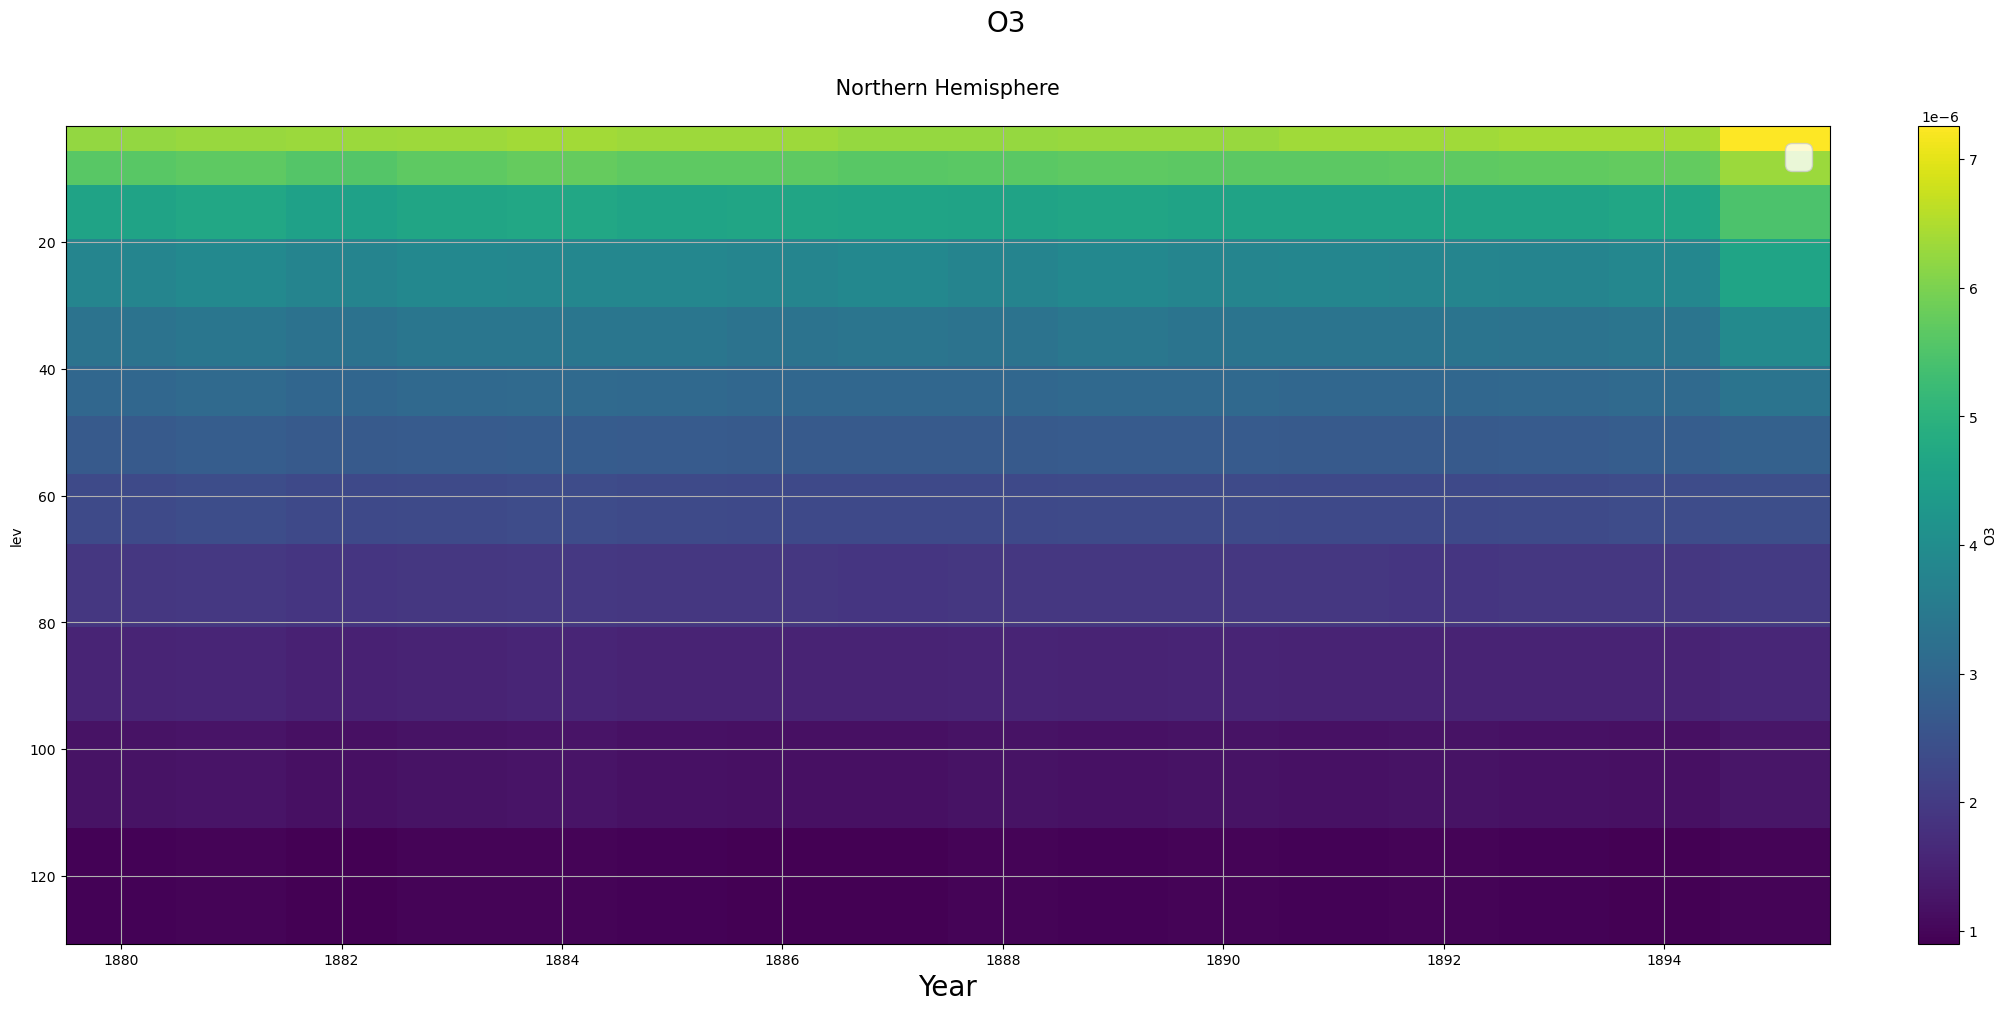

In [54]:
#Plotting to find the layer where the SO4 aerosol has its max, and when
fig, (axs1) = plt.subplots(1, 1, constrained_layout=True, figsize=(20,10))

lev_sel.plot(label="NorESM 14", ax=axs1,x='year')

fig.suptitle('O3\n', fontsize=20)

axs1.set_xlabel('Year',fontsize=20)

axs1.grid()

plt.gca().invert_yaxis()

axs1.set_title(" Northern Hemisphere \n" , fontsize=15)

plt.legend(fontsize=25)
